Adni Alaydrus


*   email: adnialaydrus30@gmail.com
*   linkedin: https://www.linkedin.com/in/adni-alaydrus/



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


import all necessary packages



In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, r2_score

# Problem Overview
## Objective
A lending company that we are partnering with wanted us to predict credit risk.

## Why is it important?
This is crucial as it helps in determining the likelihood of a loan being repaid or defaulted. These insights are invaluable for investors when deciding on their investment choices.

## Analytical Strategy
The primary focus is on predictive analytics, which involves utilizing machine learning techniques for forecasting outcomes. However, this doesn't exclude other methodologies. Descriptive analytics will also be employed to enhance our understanding of the data involved.

# Import Data

In [3]:
# Reload modules before executing user code
%load_ext autoreload
%autoreload 2

loan_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/Credit Risk/loan_data_2007_2014.csv", index_col=0)
loan_data.head()

<ipython-input-3-efc160346678>:5: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks (1)/Credit Risk/loan_data_2007_2014.csv", index_col=0)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN




> The dataset has been successfully loaded. It contains multiple columns, and we need to find the correlation of each column with the "loan_status" column. However, it's important to note that correlation analysis is typically performed on numerical data. Since "loan_status" is a categorical variable (e.g., loan status descriptions), a direct correlation calculation might not be meaningful or possible for non-numeric columns.





Before we find the correlation of each column with the "loan_status" column, we will first clean the data.







# Cleaning Data

In [4]:
loan_data.shape

(466285, 74)

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

> From the dataframe shape and the info above, we can see that:


> we have got **466,285 samples (rows)** and **74 features (columns)** in our dataset,
we have multiple types of data, and
there are many columns consist of null values



# TEST

In [6]:
# Check for missing values in the dataset
missing_values = loan_data.isnull().sum()

# Filter out columns that have missing values
columns_with_missing_values = missing_values[missing_values > 0]

# Display columns with missing values along with the count of missing values
columns_with_missing_values.sort_values(ascending=False)

dti_joint                      466285
annual_inc_joint               466285
total_cu_tl                    466285
inq_fi                         466285
all_util                       466285
max_bal_bc                     466285
open_rv_24m                    466285
open_rv_12m                    466285
il_util                        466285
total_bal_il                   466285
mths_since_rcnt_il             466285
open_il_24m                    466285
open_il_12m                    466285
open_il_6m                     466285
open_acc_6m                    466285
verification_status_joint      466285
inq_last_12m                   466285
mths_since_last_record         403647
mths_since_last_major_derog    367311
desc                           340302
mths_since_last_delinq         250351
next_pymnt_d                   227214
total_rev_hi_lim                70276
tot_coll_amt                    70276
tot_cur_bal                     70276
emp_title                       27588
emp_length  

In [7]:
# Handling missing values
# Dropping columns with a high number of missing values
threshold = 400000
columns_with_missing_values = loan_data.isnull().sum()
columns_to_drop = columns_with_missing_values[columns_with_missing_values > threshold].index
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)
print(loan_data_cleaned.shape)

(466285, 56)


In [8]:
columns_to_drop

Index(['mths_since_last_record', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m',
       'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util',
       'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi',
       'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [9]:
loan_data_cleaned.shape

(466285, 56)

In [10]:
# Impute missing values for columns with moderate missing values
for column in loan_data_cleaned.columns:
    if loan_data_cleaned[column].isnull().sum() > 0:
        if loan_data_cleaned[column].dtype == 'object':
            mode_value = loan_data_cleaned[column].mode()[0]
            loan_data_cleaned[column].fillna(mode_value, inplace=True)
        else:
            median_value = loan_data_cleaned[column].median()
            loan_data_cleaned[column].fillna(median_value, inplace=True)

In [12]:
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 56 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    466285 non-null  object 
 11  emp_length                   466285 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

# END OF TEST

# REAL

Drop Unnecessary Samples

In the upcoming data cleaning process, I will be working with a dataset named (loan_data). My primary objective is to enhance the dataset's quality by addressing columns with excessively missing values. I will initiate the process by computing the total count and percentage of missing values in each column. Next, I will identify and compile a list of columns where more than 50% of the data is missing, which will be stored in a variable named columns_to_drop. Subsequently, I will execute the removal of these identified columns from the dataset, culminating in the creation of a refined and cleaned dataframe, which I will name (loan_data_cleaned). The outcome will encompass not only the catalog of discarded columns but also a preview of the initial rows within the newly cleaned dataframe, all of which I will thoroughly review.

In [6]:
# Identifying columns with a significant number of missing values
missing_values = loan_data.isnull().sum()
missing_values_percent = (missing_values / loan_data.shape[0]) * 100

# Columns with more than 50% missing values
columns_to_drop = missing_values_percent[missing_values_percent > 50].index.tolist()

# Dropping these columns
loan_data_cleaned = loan_data.drop(columns=columns_to_drop)

# Displaying the columns dropped and the updated dataframe
columns_to_drop, loan_data_cleaned.head()


(['desc',
  'mths_since_last_delinq',
  'mths_since_last_record',
  'mths_since_last_major_derog',
  'annual_inc_joint',
  'dti_joint',
  'verification_status_joint',
  'open_acc_6m',
  'open_il_6m',
  'open_il_12m',
  'open_il_24m',
  'mths_since_rcnt_il',
  'total_bal_il',
  'il_util',
  'open_rv_12m',
  'open_rv_24m',
  'max_bal_bc',
  'all_util',
  'inq_fi',
  'total_cu_tl',
  'inq_last_12m'],
         id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
 0  1077501    1296599       5000         5000           4975.0   36 months   
 1  1077430    1314167       2500         2500           2500.0   60 months   
 2  1077175    1313524       2400         2400           2400.0   36 months   
 3  1076863    1277178      10000        10000          10000.0   36 months   
 4  1075358    1311748       3000         3000           3000.0   60 months   
 
    int_rate  installment grade sub_grade  ... last_pymnt_amnt next_pymnt_d  \
 0     10.65       162.87     B        B2  .

In this analysis, I've focused on the remaining columns in the cleaned dataset, 'loan_data_cleaned', which may still have missing values. I calculated both the total number of missing values and their respective percentages for each column. The resulting data is organized into a DataFrame, 'remaining_missing_values_df,' with two informative columns: 'Missing Values' and 'Percentage.' I then filtered and retained only those columns with missing values (greater than 0) to pinpoint areas requiring attention. To provide a clear view of the extent of missing data, I've sorted these columns in descending order based on the percentage of missing values. This step is crucial for refining the dataset further and ensuring data quality.

In [7]:
# Analyzing remaining columns with missing values
remaining_missing_values = loan_data_cleaned.isnull().sum()
remaining_missing_values_percent = (remaining_missing_values / loan_data_cleaned.shape[0]) * 100
remaining_missing_values_df = pd.DataFrame({'Missing Values': remaining_missing_values, 'Percentage': remaining_missing_values_percent})

# Filtering columns with missing values
remaining_missing_values_df = remaining_missing_values_df[remaining_missing_values_df['Missing Values'] > 0]
remaining_missing_values_df.sort_values(by='Percentage', ascending=False)

,Missing Values,Percentage
next_pymnt_d,227214,48.728567
total_rev_hi_lim,70276,15.071469
tot_cur_bal,70276,15.071469
tot_coll_amt,70276,15.071469
emp_title,27588,5.916553
emp_length,21008,4.505399
last_pymnt_d,376,0.080637
revol_util,340,0.072917
collections_12_mths_ex_med,145,0.031097
last_credit_pull_d,42,0.009007




> As we can see from the table above, there are still many missing values



In our data preparation phase, I've addressed missing values in the loan_data_cleaned dataset to ensure data integrity. For numerical columns like 'total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt', 'revol_util', 'collections_12_mths_ex_med', 'delinq_2yrs', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'inq_last_6mths', and 'annual_inc', I've replaced missing values with the mean of their respective columns. On the other hand, for categorical columns like 'emp_title' and 'title', I've filled missing values with the string 'Unknown'. This meticulous data imputation process ensures that our dataset is ready for precise analysis or modeling by maintaining data completeness and accuracy.

In [8]:
loan_data_cleaned['total_rev_hi_lim'] = loan_data_cleaned['total_rev_hi_lim'].fillna(loan_data_cleaned['total_rev_hi_lim'].mean())
loan_data_cleaned['tot_cur_bal'] = loan_data_cleaned['tot_cur_bal'].fillna(loan_data_cleaned['tot_cur_bal'].mean())
loan_data_cleaned['tot_coll_amt'] = loan_data_cleaned['tot_coll_amt'].fillna(loan_data_cleaned['tot_coll_amt'].mean())
loan_data_cleaned['emp_title'] = loan_data_cleaned['emp_title'].fillna('Unknown')
loan_data_cleaned['revol_util'] = loan_data_cleaned['revol_util'].fillna(loan_data_cleaned['revol_util'].mean())
loan_data_cleaned['collections_12_mths_ex_med'] = loan_data_cleaned['collections_12_mths_ex_med'].fillna(loan_data_cleaned['collections_12_mths_ex_med'].mean())
loan_data_cleaned['delinq_2yrs'] = loan_data_cleaned['delinq_2yrs'].fillna(loan_data_cleaned['delinq_2yrs'].mean())
loan_data_cleaned['acc_now_delinq'] = loan_data_cleaned['acc_now_delinq'].fillna(loan_data_cleaned['acc_now_delinq'].mean())
loan_data_cleaned['total_acc'] = loan_data_cleaned['total_acc'].fillna(loan_data_cleaned['total_acc'].mean())
loan_data_cleaned['pub_rec'] = loan_data_cleaned['pub_rec'].fillna(loan_data_cleaned['pub_rec'].mean())
loan_data_cleaned['open_acc'] = loan_data_cleaned['open_acc'].fillna(loan_data_cleaned['open_acc'].mean())
loan_data_cleaned['inq_last_6mths'] = loan_data_cleaned['inq_last_6mths'].fillna(loan_data_cleaned['inq_last_6mths'].mean())
loan_data_cleaned['title'] = loan_data_cleaned['title'].fillna('Unknown')
loan_data_cleaned['annual_inc'] = loan_data_cleaned['annual_inc'].fillna(loan_data_cleaned['annual_inc'].mean())

In order to prepare our **loan_data_cleaned** dataset for robust analysis and modeling, I've executed a crucial step – the conversion of data types for specific numerical columns. These columns, including 'total_rev_hi_lim', 'tot_cur_bal', 'tot_coll_amt', 'revol_util', 'collections_12_mths_ex_med', 'delinq_2yrs', 'acc_now_delinq', 'total_acc', 'pub_rec', 'open_acc', 'inq_last_6mths', and 'annual_inc', have been transformed from their existing data types (floats or objects) into integers using the `.astype(int)` method. This conversion ensures that our data is not only consistent but also in the appropriate format for in-depth analysis and modeling. It's particularly important when working with numerical variables that are expected to be in integer format, enhancing the dataset's usability and reliability for future data-driven tasks.

In [9]:
loan_data_cleaned['total_rev_hi_lim'] =loan_data_cleaned['total_rev_hi_lim'].astype(int)
loan_data_cleaned['tot_cur_bal'] =loan_data_cleaned['tot_cur_bal'].astype(int)
loan_data_cleaned['tot_coll_amt'] =loan_data_cleaned['tot_coll_amt'].astype(int)
loan_data_cleaned['revol_util'] =loan_data_cleaned['revol_util'].astype(int)
loan_data_cleaned['collections_12_mths_ex_med'] =loan_data_cleaned['collections_12_mths_ex_med'].astype(int)
loan_data_cleaned['delinq_2yrs'] =loan_data_cleaned['delinq_2yrs'].astype(int)
loan_data_cleaned['acc_now_delinq'] =loan_data_cleaned['acc_now_delinq'].astype(int)
loan_data_cleaned['total_acc'] =loan_data_cleaned['total_acc'].astype(int)
loan_data_cleaned['pub_rec'] =loan_data_cleaned['pub_rec'].astype(int)
loan_data_cleaned['open_acc'] =loan_data_cleaned['open_acc'].astype(int)
loan_data_cleaned['inq_last_6mths'] =loan_data_cleaned['inq_last_6mths'].astype(int)
loan_data_cleaned['annual_inc'] =loan_data_cleaned['annual_inc'].astype(int)

In the process of data exploration and analysis, we have performed a thorough examination of our dataset, which we've named **loan_data_cleaned**. We have focused on iterating through its columns and selecting those with specific data types, namely 'object' (representing strings or categorical variables) and 'bool' (Boolean variables). For each of these selected columns, we have meticulously printed both the column name and the unique values contained within using the `.unique()` method. This systematic approach has enabled us to gain valuable insights into the distinct values within categorical and Boolean columns, providing a solid foundation for deeper data exploration and more insightful analysis.

In [10]:
for col in loan_data_cleaned.select_dtypes(include = ['object', 'bool']).columns:
  print(col)
  print(loan_data_cleaned[col].unique())
  print()

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

emp_title
['Unknown' 'Ryder' 'AIR RESOURCES BOARD' ... 'MecÃ¡nica'
 'Chief of Interpretation (Park Ranger)' 'Server Engineer Lead']

emp_length
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08'



> Based on the observations I've made from the data presented above, I've identified several columns that appear to require attention in terms of data cleaning and improvement.



In [11]:
col_need_to_clean = ['term', 'emp_length', 'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']

Now, let's focus on cleaning and enhancing the 'term' column within our DataFrame, which we've labeled as **'loan_data_cleaned'**. To initiate this process, we'll begin by printing out the unique values present in the 'term' column, providing us with a clear understanding of its current content and structure.

In [12]:
loan_data_cleaned['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

 In our data refinement process, we're taking steps to enhance the 'term' column within our DataFrame, **'loan_data_cleaned'**. To achieve this, we're first eliminating the ' months' string from each value in the 'term' column, a task made possible through the `.str.strip()` method. After this cleaning step, we're converting the treated values into integers using the `.astype(int)` method. This transformation effectively rids the 'term' column of non-numeric characters.

In [13]:
loan_data_cleaned['term'] = loan_data_cleaned['term'].str.strip(' months')
loan_data_cleaned['term'] = loan_data_cleaned['term'].astype(int)

 ensuring that it's now in a numerical format, ready for precise numerical calculations and analysis.

In [14]:
loan_data_cleaned['term']

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64



> As you can see from the results above, we've successfully completed the data cleaning process for the 'term' column. The 'months' have been removed, and the data type has been converted to a numeric format. This transformation ensures that the data is now clean, consistent, and ready for further analysis or calculations.



Let's turn our attention to the 'emp_length' column within our **'loan_data_cleaned'** DataFrame as we delve into the data cleaning process. Our initial step involves gaining insights by printing out the unique values present in the 'emp_length' column, which will provide us with a comprehensive understanding of its content and structure.

In [15]:
loan_data_cleaned['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Next in our data refinement process, we're addressing the 'emp_length' column within our **'loan_data_cleaned'** DataFrame. To ensure its consistency and usability, we're employing a series of steps. Initially, we're using the `.str.replace()` method with a regular expression, '[^0-9]', to eliminate any non-numeric characters, preserving only the numeric part of each entry. Following this, we're handling missing values in the 'emp_length' column by replacing them with 0 through the `.fillna()` method. To wrap it up, we're converting the 'emp_length' column into an integer data type using `.astype(int).` These measures collectively result in a refined and standardized 'emp_length' column, now exclusively containing numeric values, making it ready for precise analysis and modeling.

In [16]:
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].str.replace('[^0-9]', '')
loan_data_cleaned['emp_length'].fillna(value = 0, inplace=True)
loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].astype(int)

<ipython-input-16-c9d5924a60c0>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  loan_data_cleaned['emp_length'] = loan_data_cleaned['emp_length'].str.replace('[^0-9]', '')


In [17]:
loan_data_cleaned['emp_length'].unique()

array([10,  1,  3,  8,  9,  4,  5,  6,  2,  7,  0])


> As you can observe from the results displayed above, we've successfully completed the data cleaning process for the 'emp_length' column. The unwanted 'year' components have been effectively removed, resulting in a cleaned dataset. Furthermore, the data type has been intelligently converted to a numeric format. This meticulous transformation ensures that the 'emp_length' column is now pristine, consistent, and well-prepared for any subsequent data analysis or modeling.


Now, let's turn our attention to the date-related columns within the **'loan_data_cleaned'** DataFrame, as indicated in the **'col_date'** variable.

In [18]:
col_date = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d']
loan_data_cleaned[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,Dec-11,Jan-85,Jan-15,NaN,Jan-16
1,Dec-11,Apr-99,Apr-13,NaN,Sep-13
2,Dec-11,Nov-01,Jun-14,NaN,Jan-16
3,Dec-11,Feb-96,Jan-15,NaN,Jan-15
4,Dec-11,Jan-96,Jan-16,Feb-16,Jan-16
...,...,...,...,...,...
466280,Jan-14,Apr-03,Jan-16,Feb-16,Jan-16
466281,Jan-14,Jun-97,Dec-14,NaN,Jan-16
466282,Jan-14,Dec-01,Jan-16,Feb-16,Dec-15
466283,Jan-14,Feb-03,Dec-14,NaN,Apr-15


To begin, we'll take a closer look at the **'issue_d'** column by showcasing its unique values, allowing us to better understand its formatting and content.

In [19]:
loan_data_cleaned['issue_d'].unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07', 'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jul-13', 'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jul-12', 'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12',
       'Jan-12', 'Dec-14', 'Nov-14', 'Oct-14', 'Sep-14', 'Aug-14',
       'Jul-14', 'Jun-14', 'May-14', 'Apr-14', 'Mar-14', 'Feb-

Following our initial exploration, we're proceeding to a crucial transformation step involving specific date columns, namely **'issue_d,' 'earliest_cr_line,' 'last_pymnt_d,' 'next_pymnt_d,' and 'last_credit_pull_d'**. We'll convert these columns from their initial string format, which is in the **'%b-%y'** format, to a standardized datetime format. This transformation is facilitated by the `pd.to_datetime()` function, allowing us to specify the exact format. By doing so, we ensure that these date columns are now treated as datetime objects, making them perfectly suited for chronological analysis and precise calculations.

In [20]:
loan_data_cleaned['issue_d'] = pd.to_datetime(loan_data_cleaned['issue_d'], format='%b-%y')
loan_data_cleaned['earliest_cr_line'] = pd.to_datetime(loan_data_cleaned['earliest_cr_line'], format='%b-%y')
loan_data_cleaned['last_pymnt_d'] = pd.to_datetime(loan_data_cleaned['last_pymnt_d'], format='%b-%y')
loan_data_cleaned['next_pymnt_d'] = pd.to_datetime(loan_data_cleaned['next_pymnt_d'], format='%b-%y')
loan_data_cleaned['last_credit_pull_d'] = pd.to_datetime(loan_data_cleaned['last_credit_pull_d'], format='%b-%y')

Lastly, our code showcases the transformed date columns within the DataFrame, providing us with a clear view of the updates and improvements made to these important date-related variables.

In [21]:
loan_data_cleaned[col_date]

,issue_d,earliest_cr_line,last_pymnt_d,next_pymnt_d,last_credit_pull_d
0,2011-12-01,1985-01-01,2015-01-01,NaT,2016-01-01
1,2011-12-01,1999-04-01,2013-04-01,NaT,2013-09-01
2,2011-12-01,2001-11-01,2014-06-01,NaT,2016-01-01
3,2011-12-01,1996-02-01,2015-01-01,NaT,2015-01-01
4,2011-12-01,1996-01-01,2016-01-01,2016-02-01,2016-01-01
...,...,...,...,...,...
466280,2014-01-01,2003-04-01,2016-01-01,2016-02-01,2016-01-01
466281,2014-01-01,1997-06-01,2014-12-01,NaT,2016-01-01
466282,2014-01-01,2001-12-01,2016-01-01,2016-02-01,2015-12-01
466283,2014-01-01,2003-02-01,2014-12-01,NaT,2015-04-01


We start by fetching the unique values contained within the **'loan_status'** column through the use of `loan_data.loan_status.unique()`. This initial step helps us gain a better understanding of the specific categories or labels present in the **'loan_status'** column, a key aspect of our data analysis.

In [22]:
loan_data.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Moving forward, we're implementing a binary labeling process for the **'loan_status'** column. We assign a binary label to each row based on whether the value in that row aligns with specific categories: 'Charged Off,' 'Default,' 'Late (31-120 days),' 'Late (16-30 days),' or 'Does not meet the credit policy. Status:Charged Off.' When a row's **'loan_status'** value corresponds to one of these categories, we assign it a label of 0; otherwise, it receives a label of 1. This transformation effectively converts the **'loan_status'** column into a binary classification problem, **where 0 typically signifies a negative outcome** (e.g., loan default), and **1 represents a positive outcome** (e.g., successful loan repayment).

In [23]:
loan_data_cleaned['loan_status'] = np.where(loan_data_cleaned.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)', 'Does not meet the credit policy. Status:Charged Off']), 0, 1)

I'd like to perform a check to see if there are any remaining null values in our dataset. This step is crucial to ensure that we have addressed all missing data and that our dataset is now complete and ready for analysis or modeling.

In [24]:
loan_data_cleaned.isnull().sum().sort_values(ascending=False)

next_pymnt_d                  227214
last_pymnt_d                     376
last_credit_pull_d                42
earliest_cr_line                  29
id                                 0
total_rec_int                      0
revol_bal                          0
revol_util                         0
total_acc                          0
initial_list_status                0
out_prncp                          0
out_prncp_inv                      0
total_pymnt                        0
total_pymnt_inv                    0
total_rec_prncp                    0
recoveries                         0
total_rec_late_fee                 0
open_acc                           0
collection_recovery_fee            0
last_pymnt_amnt                    0
collections_12_mths_ex_med         0
policy_code                        0
application_type                   0
acc_now_delinq                     0
tot_coll_amt                       0
tot_cur_bal                        0
pub_rec                            0
i



> From the info above, I don't see any data types other than int, so it's already cleaned. However, the problem is that there are still missing values.



Now, let's address the issue of missing values. We're going to fill in those gaps to ensure our data is complete. This code goes through each column in our dataset. If a column has missing values, it checks its data type. If it's a categorical column (with the data type 'object'), we fill the missing values with the most common value (mode). For numerical columns, we use the median value to impute missing data. This way, we make sure our dataset is ready for analysis with no gaps in the data.

In [25]:
# Impute missing values for columns with moderate missing values
for column in loan_data_cleaned.columns:
    if loan_data_cleaned[column].isnull().sum() > 0:
        if loan_data_cleaned[column].dtype == 'object':
            mode_value = loan_data_cleaned[column].mode()[0]
            loan_data_cleaned[column].fillna(mode_value, inplace=True)
        else:
            median_value = loan_data_cleaned[column].median()
            loan_data_cleaned[column].fillna(median_value, inplace=True)

In [26]:
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   id                          466285 non-null  int64         
 1   member_id                   466285 non-null  int64         
 2   loan_amnt                   466285 non-null  int64         
 3   funded_amnt                 466285 non-null  int64         
 4   funded_amnt_inv             466285 non-null  float64       
 5   term                        466285 non-null  int64         
 6   int_rate                    466285 non-null  float64       
 7   installment                 466285 non-null  float64       
 8   grade                       466285 non-null  object        
 9   sub_grade                   466285 non-null  object        
 10  emp_title                   466285 non-null  object        
 11  emp_length                  466285 non-



> It seems like there are still null values, and some columns don't have a numeric data type.



Okay, let's address that issue. We want to convert some date columns into a numeric format. So, we're taking columns like 'earliest_cr_line,' 'issue_d,' 'last_pymnt_d,' 'next_pymnt_d,' and 'last_credit_pull_d' and changing their data type from datetime to numeric. This allows us to represent the time difference in months since those dates, making it more convenient for our analysis.

In [27]:
from datetime import date

def date_columns(df, column):
  today_date = pd.to_datetime(date.today().strftime('%Y-%m-%d'))
  df[column] = pd.to_datetime(df[column], format =( '%b-%y'))
  df['mths_since_' + column] = round(pd.to_numeric((today_date - df[column]) / np.timedelta64(1, 'M')))
  df.drop(columns = [column], inplace = True)

#apply to data_encoded
date_columns(loan_data_cleaned, 'earliest_cr_line')
date_columns(loan_data_cleaned, 'issue_d')
date_columns(loan_data_cleaned, 'last_pymnt_d')
date_columns(loan_data_cleaned, 'next_pymnt_d')
date_columns(loan_data_cleaned, 'last_credit_pull_d')

Now let's re-check the info of the dataset after changing data type

In [28]:
loan_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   id                             466285 non-null  int64  
 1   member_id                      466285 non-null  int64  
 2   loan_amnt                      466285 non-null  int64  
 3   funded_amnt                    466285 non-null  int64  
 4   funded_amnt_inv                466285 non-null  float64
 5   term                           466285 non-null  int64  
 6   int_rate                       466285 non-null  float64
 7   installment                    466285 non-null  float64
 8   grade                          466285 non-null  object 
 9   sub_grade                      466285 non-null  object 
 10  emp_title                      466285 non-null  object 
 11  emp_length                     466285 non-null  int64  
 12  home_ownership                

# Exploratory Data Analysis

In [29]:
loan_data_cleaned['loan_status'].value_counts()

1    414099
0     52186
Name: loan_status, dtype: int64

## What are the Borrowers' Purposes of Borrowing Money?

Here we can tell that the top 3 purposes of the borrowers are debt consolidation, credit card debt, and home improvement.

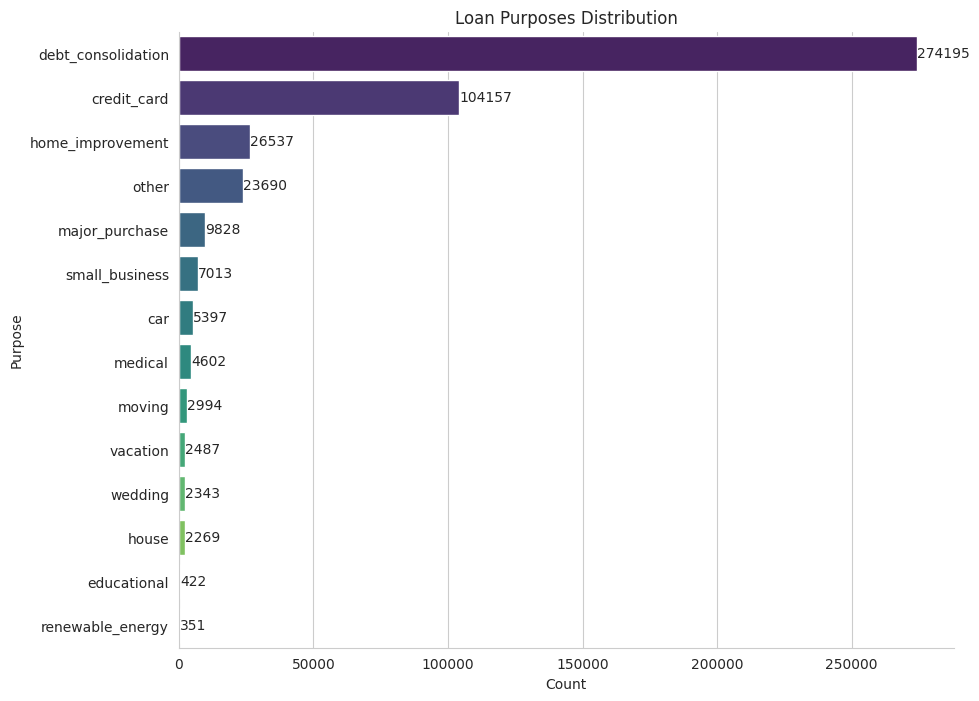

In [30]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Increase the figure size for better readability
plt.figure(figsize=(10, 8))

# Create the countplot
ax = sns.countplot(
    y='purpose',
    data=loan_data_cleaned,
    order=loan_data_cleaned['purpose'].value_counts().index,
    palette='viridis'  # A visually pleasing color palette
)

# Add a title to the plot
ax.set_title('Loan Purposes Distribution')

# Set the x and y labels
ax.set_xlabel('Count')
ax.set_ylabel('Purpose')

# Optional: Add annotations to each bar
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 5,  # Position of text
             p.get_y() + p.get_height() / 2,  # Y position
             '{:1.0f}'.format(width),  # Text
             ha='left',  # Horizontal alignment
             va='center')  # Vertical alignment

# Remove the 'AxesSubplot' annotation (optional)
sns.despine()

# Show the plot
plt.show()

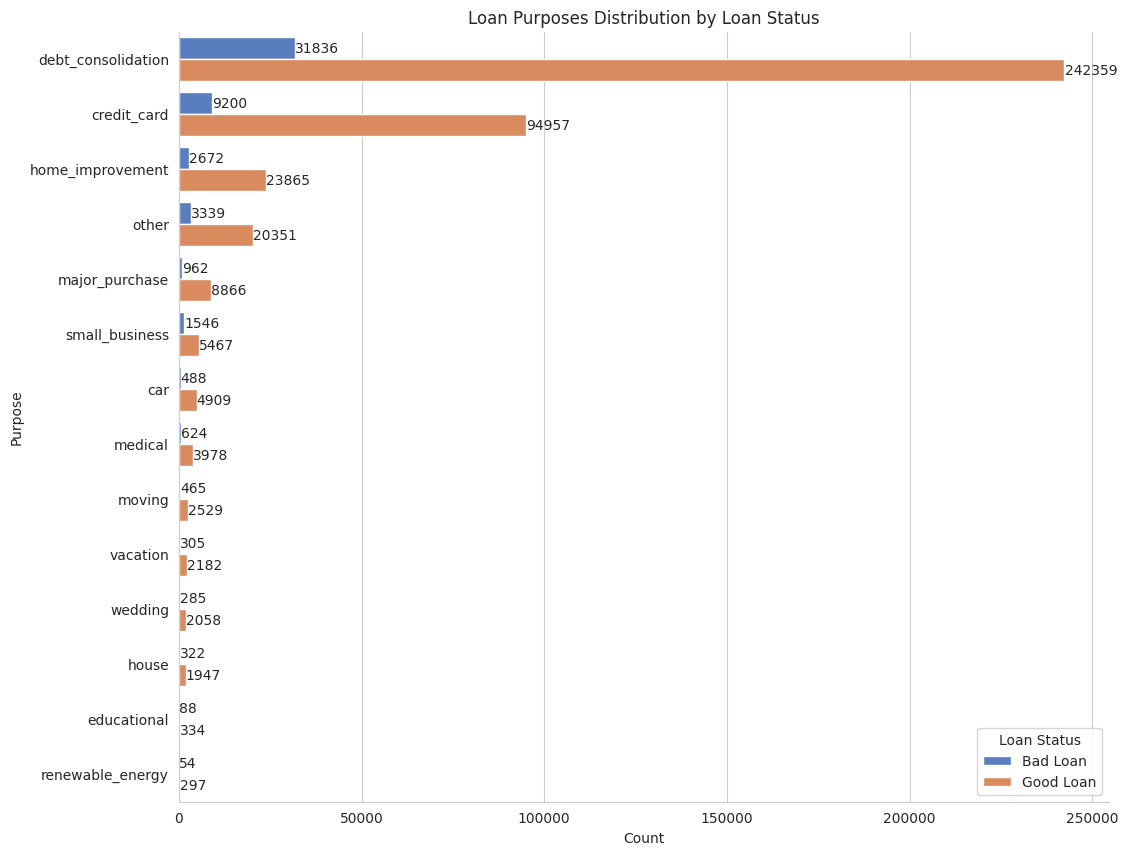

In [31]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Increase the figure size for better readability
plt.figure(figsize=(12, 10))

# Create the countplot
ax = sns.countplot(
    y='purpose',
    hue='loan_status',
    data=loan_data_cleaned,
    order=loan_data_cleaned['purpose'].value_counts().index,
    palette='muted'  # A palette that clearly differentiates the categories
)

# Add a title to the plot
ax.set_title('Loan Purposes Distribution by Loan Status')

# Set the x and y labels
ax.set_xlabel('Count')
ax.set_ylabel('Purpose')

# Improve the legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['Bad Loan', 'Good Loan'], title='Loan Status', loc='lower right')

# Optional: Add annotations to each bar for better clarity of count
for p in ax.patches:
    width = p.get_width()  # get the width of the bar
    ax.text(width + 3,  # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,  # get Y position of text
            '{:1.0f}'.format(width),  # set the text to be the width of the bar
            ha='left',  # horizontal alignment
            va='center')  # vertical alignment

# Remove the 'AxesSubplot' annotation and the spines (optional)
sns.despine()

# Show the plot
plt.show()

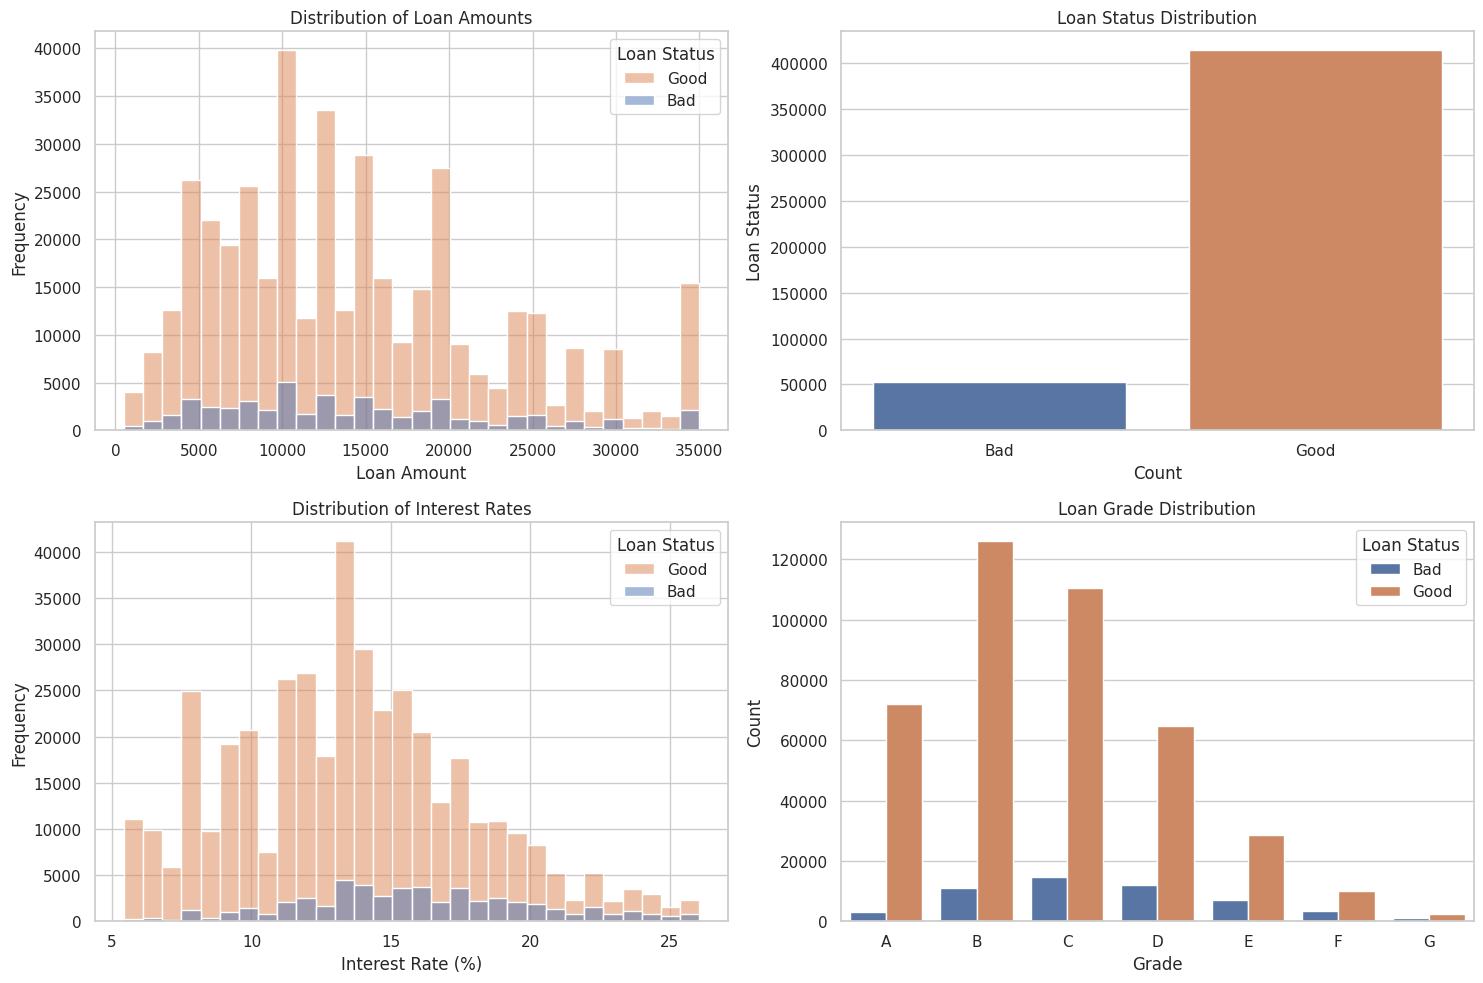

In [38]:
# Setting plot style
sns.set(style="whitegrid")

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Loan Status Analysis
sns.countplot(x='loan_status', data=loan_data_cleaned, ax=axes[0, 1], order=[0, 1])
axes[0, 0].set_title('Loan Status Distribution')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Loan Status')
axes[0, 0].set_xticklabels(['Bad', 'Good'])

# Distribution of Loan Amounts
sns.histplot(x='loan_amnt', data=loan_data_cleaned, hue='loan_status', bins=30, ax=axes[0, 0], kde=False, color='blue')
axes[0, 1].set_title('Distribution of Loan Amounts')
axes[0, 1].set_xlabel('Loan Amount')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend(title="Loan Status", labels=['Good', 'Bad'])

# Interest Rate Analysis
sns.histplot(x='int_rate',data=loan_data_cleaned, hue='loan_status', bins=30, ax=axes[1, 0], kde=False, color='green')
axes[1, 0].set_title('Distribution of Interest Rates')
axes[1, 0].set_xlabel('Interest Rate (%)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend(title="Loan Status", labels=['Good', 'Bad'])

# Loan Grade Distribution
sns.countplot(x='grade', data=loan_data_cleaned, hue='loan_status', ax=axes[1, 1],  order = sorted(loan_data_cleaned['grade'].unique()))
axes[1, 1].set_title('Loan Grade Distribution')
axes[1, 1].set_xlabel('Grade')
axes[1, 1].set_ylabel('Count')
axes[1, 1].legend(title="Loan Status", labels=['Bad', 'Good'])

# Adjust layout
plt.tight_layout()
plt.show()

> *   Loan Amounts: There is a higher frequency of smaller loans, and these are predominantly "Good," suggesting that smaller loan amounts are associated with a lower risk of default.

> *   Interest Rates: The majority of loans, both "Good" and "Bad," have interest rates clustering around 10-15%. This implies that while interest rates are an important factor, they are not the sole predictor of loan quality.

> *   Loan Status: The vast majority of loans in this dataset are classified as "Good," indicating a healthy loan portfolio overall.

> * Loan Grades: As loan grades decrease from A to G, the number of "Good" loans decreases while the number of "Bad" loans increases, albeit not proportionally. This trend suggests that the grading system has some predictive power regarding the likelihood of a loan being "Good" or "Bad," with lower grades indicating higher risk.

> In conclusion, the data suggests a correlation between loan amounts, interest rates, and loan grades with the likelihood of a loan being considered "Good." However, the exact nature of these relationships would require further statistical analysis to determine causation and to develop a predictive model for loan performance. It's also critical to account for external factors not presented in these charts that might influence loan outcomes, such as economic conditions, borrower credit history, and loan duration.

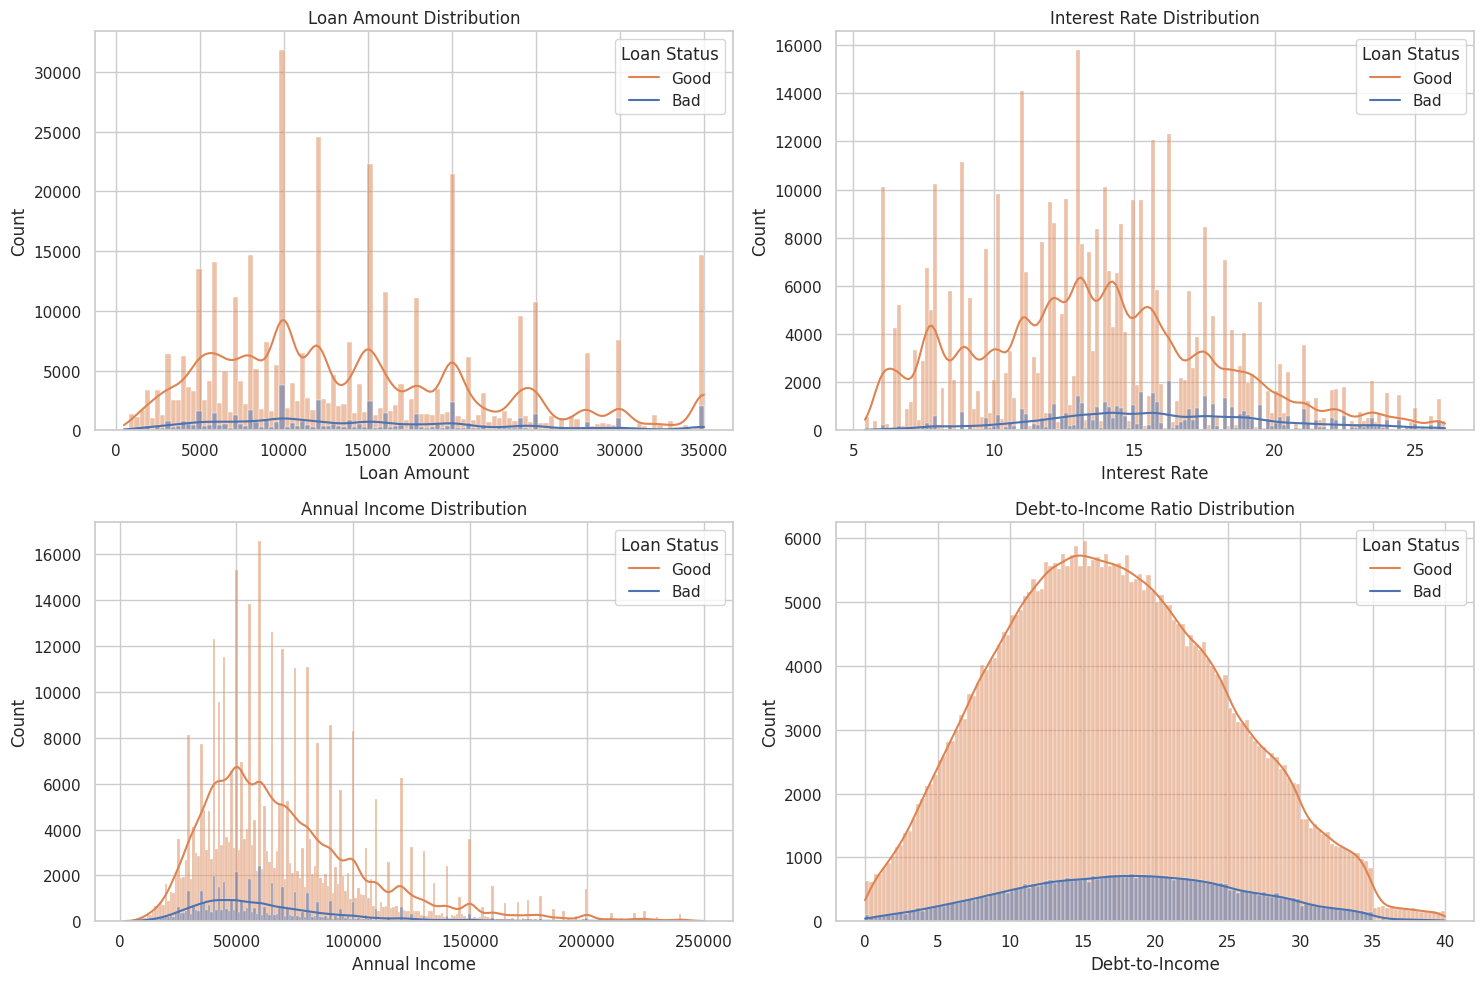

In [42]:
# Plotting distributions and relationships of the selected variables
plt.figure(figsize=(15, 10))

# Distribution of loan amounts
plt.subplot(2, 2, 1)
sns.histplot(x='loan_amnt', data=loan_data_cleaned, hue='loan_status', kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.legend(title="Loan Status", labels=['Good', 'Bad'])

# Distribution of interest rates
plt.subplot(2, 2, 2)
sns.histplot(x='int_rate', data=loan_data_cleaned, hue='loan_status', kde=True, color='orange')
plt.title('Interest Rate Distribution')
plt.xlabel('Interest Rate')
plt.legend(title="Loan Status", labels=['Good', 'Bad'])

# Distribution of annual income
plt.subplot(2, 2, 3)
sns.histplot(data=loan_data_cleaned[loan_data_cleaned['annual_inc'] < 250000], x='annual_inc', kde=True, hue='loan_status', color='green')  # Limiting to a reasonable range for better visualization
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.legend(title="Loan Status", labels=['Good', 'Bad'])

# Distribution of debt-to-income ratio
plt.subplot(2, 2, 4)
sns.histplot(x='dti', data=loan_data_cleaned, hue='loan_status', kde=True, color='red')
plt.title('Debt-to-Income Ratio Distribution')
plt.xlabel('Debt-to-Income')
plt.legend(title="Loan Status", labels=['Good', 'Bad'])

plt.tight_layout()
plt.show()

> * Loan Amount Distribution: This plot shows the count of loans at different loan amounts. Both "Good" and "Bad" loans are represented, with "Good" loans being more prevalent across all loan amounts. The distribution of "Good" loans appears to be wider, while "Bad" loans are more concentrated in the lower loan amounts.

> * Interest Rate Distribution: The second plot illustrates the distribution of interest rates for loans. The data shows a wide range of interest rates for both "Good" and "Bad" loans, with a peak at around 10-15% for "Good" loans. "Bad" loans also peak around this interest rate, but the count is significantly lower compared to "Good" loans.

> * Annual Income Distribution: This plot reflects the distribution of the borrowers' annual incomes, categorized by the status of their loans. The "Good" loans are more widely distributed across different income levels, peaking around the lower income range. "Bad" loans are less frequent and also peak at the lower income range, indicating that lower income might be associated with a higher risk of a loan being "Bad."

> * Debt-to-Income Ratio Distribution: The final plot shows the distribution of the debt-to-income (DTI) ratio for loans. The DTI ratio is an indicator of a borrower's ability to manage monthly payments and repay debts. The "Good" loans show a normal distribution with a peak at a DTI ratio of around 17.5%, while "Bad" loans have a similar shape but with a much lower count. The DTI distribution for "Good" loans is also broader, suggesting that "Good" loans are associated with a wide range of DTI ratios, whereas "Bad" loans are more likely to have a narrower range of DTI ratios.

In conclusion, the distributions suggest that "Good" loans are more prevalent across all categories and tend to have a wider range of loan amounts, interest rates, and income levels. Lower loan amounts, interest rates around 10-15%, lower incomes, and a moderate DTI ratio seem to be common characteristics of "Good" loans. In contrast, "Bad" loans are less frequent, concentrated in lower loan amounts and income levels, and peak around the same interest rates as "Good" loans. The data suggests that while income and DTI ratios are important factors, they alone do not predict loan status. A comprehensive analysis considering all these variables in conjunction would provide better insights into the factors influencing loan performance.

# Correlation Analysis

Let's calculate the correlation of each column with the 'loan_status' column.

In [43]:
# Calculate correlation of each column with the 'loan_status' column
correlation_with_loan_status = loan_data_cleaned.corr()['loan_status']

# Sort the correlations for better understanding
sorted_correlation = correlation_with_loan_status.sort_values(ascending=False)

# Display the sorted correlation values
sorted_correlation

<ipython-input-43-28f07108e4ec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_loan_status = loan_data_cleaned.corr()['loan_status']


loan_status                      1.000000
total_rec_prncp                  0.254255
total_pymnt_inv                  0.194638
total_pymnt                      0.193977
last_pymnt_amnt                  0.170164
out_prncp                        0.150442
out_prncp_inv                    0.150430
member_id                        0.092375
id                               0.091531
annual_inc                       0.049484
tot_cur_bal                      0.045415
total_rev_hi_lim                 0.033691
mths_since_earliest_cr_line      0.033515
total_rec_int                    0.022833
total_acc                        0.022366
emp_length                       0.020773
revol_bal                        0.018536
pub_rec                          0.008278
open_acc                         0.005270
collections_12_mths_ex_med       0.004131
tot_coll_amt                     0.001053
acc_now_delinq                   0.000083
delinq_2yrs                     -0.002873
funded_amnt_inv                 -0

> As observed in the sorted correlation results above, although the correlations are relatively modest in magnitude, they can still provide valuable insights and be useful in our analysis.


We can create a heatmap by selecting the top correlated features.

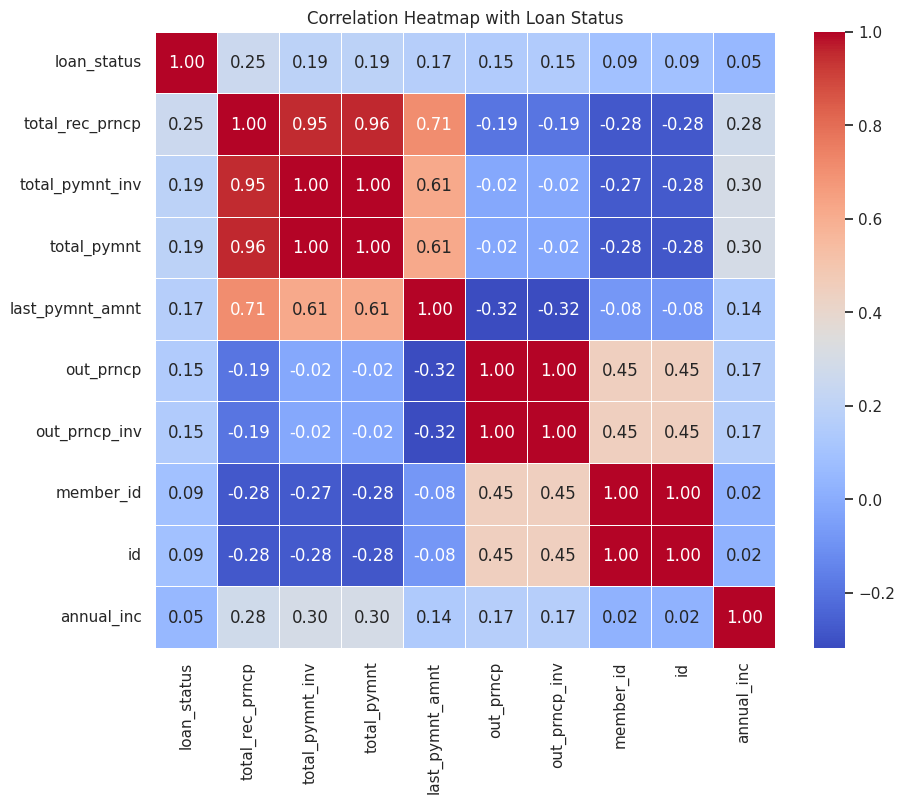

In [44]:
# Select the top correlated features
top_features = sorted_correlation.index[:10]

# Extract the correlation matrix for the top features
correlation_matrix = loan_data_cleaned[top_features].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with Loan Status')
plt.show()



> The heatmap provides evidence that repayment behavior (such as the amount paid) is closely related to the progress of loan repayment (like outstanding principal). Identifiers do not influence loan outcomes, which aligns with expectations since they are not financial indicators. This heatmap would be useful for identifying variables that are most strongly associated with loan status, which could be critical for building predictive models for loan performance or default likelihood.



# Modelling

Now lets identifies these categorical columns by employing the `.select_dtypes()` method, specifically zeroing in on those carrying the 'object' data type. Following this, it dives deeper into the data, meticulously calculating the number of distinct values within each of these categorical columns using `.nunique()`. What sets this code apart is its organization of these unique value counts in descending order, which provides a quick and insightful glimpse into which categorical columns boast the most diverse range of categories. This information serves as a valuable compass for making informed decisions on how best to encode these categorical variables and expertly guides our subsequent data processing endeavors.v

In [59]:
# Encoding categorical variables
# Identify categorical variables
categorical_columns = loan_data_cleaned.select_dtypes(include=['object']).columns
unique_values_in_categorical_columns = loan_data_cleaned[categorical_columns].nunique()
unique_values_in_categorical_columns.sort_values(ascending=False)

url                    466285
emp_title              205476
title                   63099
zip_code                  888
addr_state                 50
sub_grade                  35
purpose                    14
grade                       7
home_ownership              6
verification_status         3
pymnt_plan                  2
initial_list_status         2
application_type            1
dtype: int64

So, after checking our dataset's categorical columns, I found that some of them had too many unique values, making things a bit complex. So, I decided to drop those columns, like **'emp_title' and 'title'**, to simplify our data and speed up computations. After that, I applied one-hot encoding to the remaining categorical columns to make them more machine-friendly. This means turning them into 0s and 1s, which is great for analysis. Finally, I checked to make sure our dataset's shape didn't change drastically after encoding. It's all about getting our data ready for analysis and modeling, while dealing with unique value issues in the categorical columns.

In [60]:
# Dropping columns with high cardinality or only one unique value
columns_to_drop_high_cardinality = unique_values_in_categorical_columns[unique_values_in_categorical_columns > 20].index
columns_to_drop_single_value = unique_values_in_categorical_columns[unique_values_in_categorical_columns == 1].index
columns_to_drop = columns_to_drop_high_cardinality.union(columns_to_drop_single_value)
data_encoded = loan_data_cleaned.drop(columns=columns_to_drop)

# Apply one-hot encoding to the remaining categorical columns
data_encoded = pd.get_dummies(data_encoded, columns=data_encoded.select_dtypes(include=['object']).columns, drop_first=True)

# Check the shape of the dataset after encoding
data_encoded.shape

(466285, 68)

First, we begin by dividing the data into two distinct sets: the training dataset, which comprises 80% of the data, and the testing dataset, which makes up the remaining 20%. This separation is essential for evaluating the performance of our machine learning models and ensuring they generalize well to new, unseen data.

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, r2_score

# Split the data into training and testing sets
X = data_encoded.drop('loan_status', axis=1)
y = data_encoded['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
# Train the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Predict on the test set and calculate evaluation metrics
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)
print("R² Score:", r2)

Accuracy: 0.9909140299958538
Precision: 0.9899665818584953
Recall: 0.9998952761487401
Confusion Matrix:
 [[ 14492   1258]
 [    13 124123]]
R² Score: 0.9090628169207147


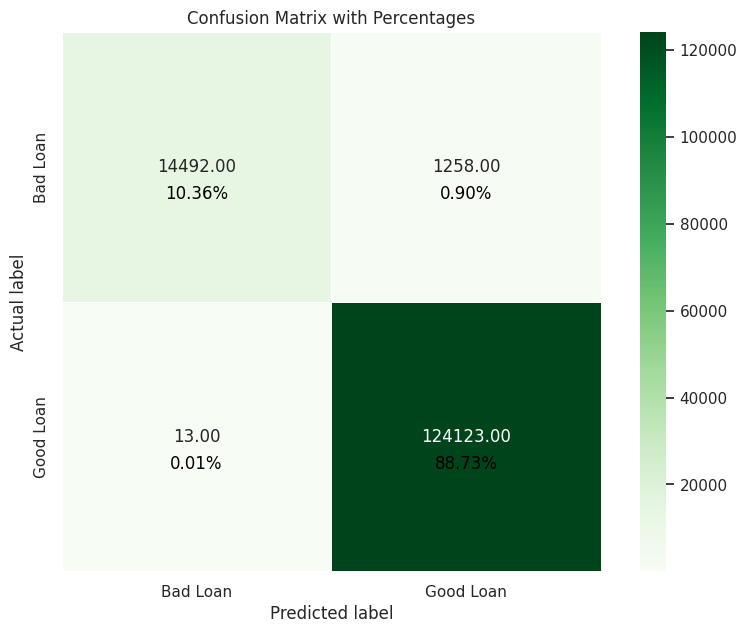

In [67]:
cm_percentage = conf_matrix / np.sum(conf_matrix) * 100

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt=".2f", linewidths=.5, square=True, cmap='Greens',
            xticklabels=['Bad Loan', 'Good Loan'],
            yticklabels=['Bad Loan', 'Good Loan'])

for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j+0.5, i+0.6, f'{cm_percentage[i, j]:.2f}%',
                 fontsize=12, ha='center', va='center', color='black')

# Add labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Percentages')

# Show the plot
plt.show()

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set and calculate evaluation metrics
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print or use the evaluation metrics for the Random Forest model
print("Random Forest Classifier Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)
print("R2 Score:", r2_rf)

Random Forest Classifier Metrics:
Accuracy: 0.9928227270777633
Precision: 0.9919848487270054
Recall: 0.9999919443191339
Confusion Matrix:
[[ 14747   1003]
 [     1 124135]]
R2 Score: 0.9281660646643569


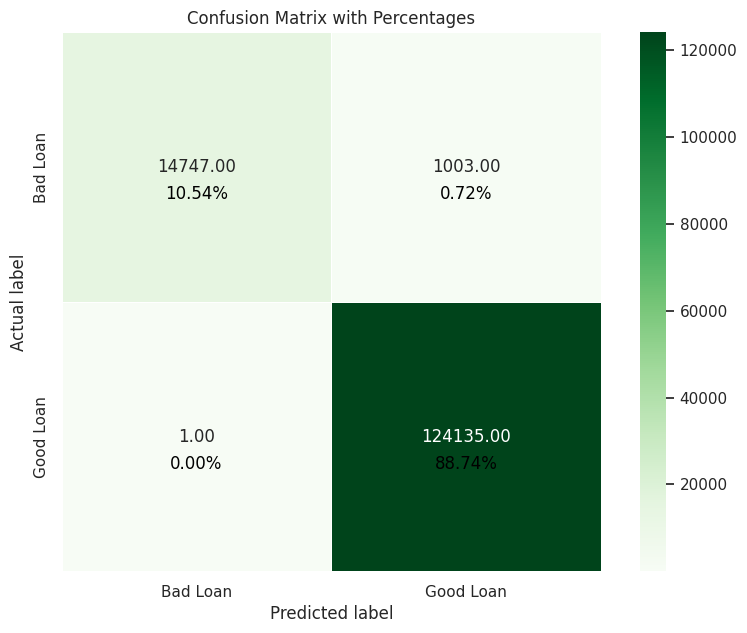

In [69]:
cm_percentage = conf_matrix_rf / np.sum(conf_matrix_rf) * 100

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt=".2f", linewidths=.5, square=True, cmap='Greens',
            xticklabels=['Bad Loan', 'Good Loan'],
            yticklabels=['Bad Loan', 'Good Loan'])

for i in range(conf_matrix_rf.shape[0]):
    for j in range(conf_matrix_rf.shape[1]):
        plt.text(j+0.5, i+0.6, f'{cm_percentage[i, j]:.2f}%',
                 fontsize=12, ha='center', va='center', color='black')

# Add labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Percentages')

# Show the plot
plt.show()

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Predict on the test set and calculate evaluation metrics
y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

# Print or use the evaluation metrics for the Decision Tree model
print("Decision Tree Classifier Metrics:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)
print("Confusion Matrix:")
print(conf_matrix_dt)
print("R2 Score:", r2_dt)


Decision Tree Classifier Metrics:
Accuracy: 0.9867677966344023
Precision: 0.9928183965115623
Recall: 0.9922665463684991
Confusion Matrix:
[[ 14859    891]
 [   960 123176]]
R2 Score: 0.8675651251929528


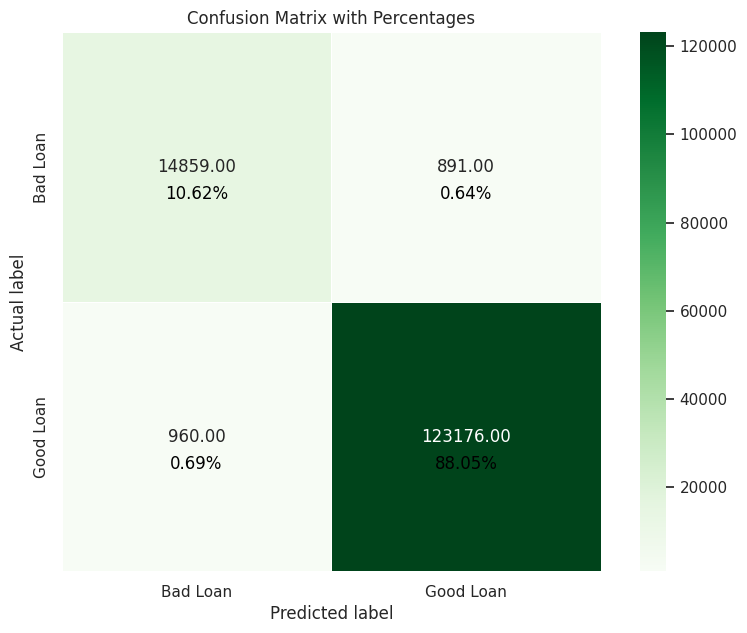

In [71]:
cm_percentage = conf_matrix_dt / np.sum(conf_matrix_dt) * 100

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_dt, annot=True, fmt=".2f", linewidths=.5, square=True, cmap='Greens',
            xticklabels=['Bad Loan', 'Good Loan'],
            yticklabels=['Bad Loan', 'Good Loan'])

for i in range(conf_matrix_dt.shape[0]):
    for j in range(conf_matrix_dt.shape[1]):
        plt.text(j+0.5, i+0.6, f'{cm_percentage[i, j]:.2f}%',
                 fontsize=12, ha='center', va='center', color='black')

# Add labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Percentages')

# Show the plot
plt.show()

In [72]:
from sklearn.neighbors import KNeighborsClassifier

# Train the k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

# Predict on the test set and calculate evaluation metrics
y_pred_knn = knn_classifier.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print or use the evaluation metrics for the k-NN model
print("k-Nearest Neighbors Classifier Metrics:")
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("Confusion Matrix:")
print(conf_matrix_knn)
print("R2 Score:", r2_knn)


k-Nearest Neighbors Classifier Metrics:
Accuracy: 0.8968660194729995
Precision: 0.9012853244767625
Recall: 0.992484049751885
Confusion Matrix:
[[  2256  13494]
 [   933 123203]]
R2 Score: -0.03221930785589988


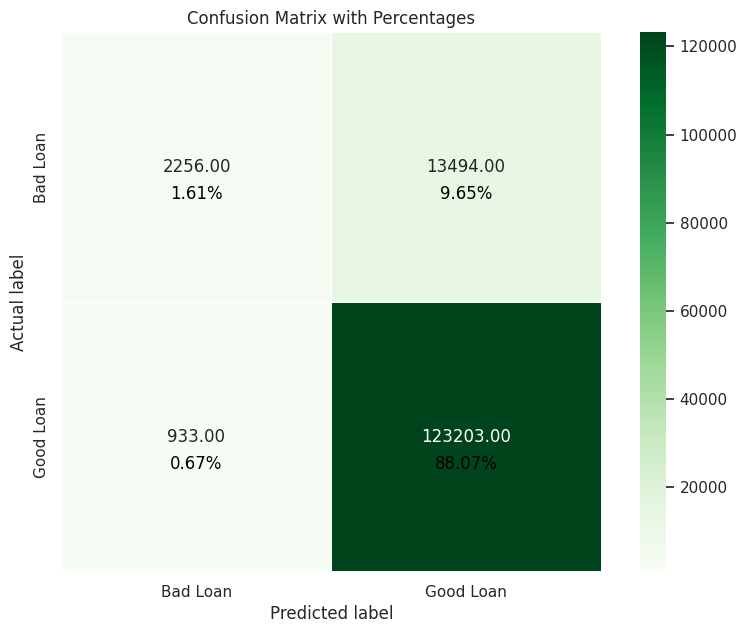

In [73]:
cm_percentage = conf_matrix_knn / np.sum(conf_matrix_knn) * 100

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_knn, annot=True, fmt=".2f", linewidths=.5, square=True, cmap='Greens',
            xticklabels=['Bad Loan', 'Good Loan'],
            yticklabels=['Bad Loan', 'Good Loan'])

for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        plt.text(j+0.5, i+0.6, f'{cm_percentage[i, j]:.2f}%',
                 fontsize=12, ha='center', va='center', color='black')

# Add labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Percentages')

# Show the plot
plt.show()

In [74]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, r2_score

# Train the Multi-Layer Perceptron Classifier
mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred_mlp = mlp_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp)
recall_mlp = recall_score(y_test, y_pred_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

# Print the evaluation metrics for the MLP model
print("Multi-Layer Perceptron Classifier Metrics:")
print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("Recall:", recall_mlp)
print("Confusion Matrix:")
print(conf_matrix_mlp)
print("R2 Score:", r2_mlp)


Multi-Layer Perceptron Classifier Metrics:
Accuracy: 0.8990034742576097
Precision: 0.8978301750325474
Recall: 0.9999838886382677
Confusion Matrix:
[[  1624  14126]
 [     2 124134]]
R2 Score: -0.010826532292794955


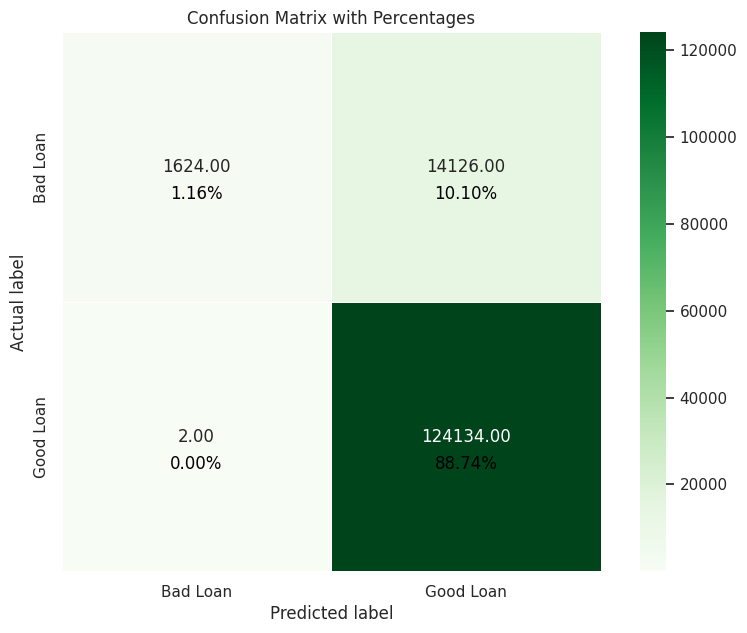

In [75]:
cm_percentage = conf_matrix_mlp / np.sum(conf_matrix_mlp) * 100

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_mlp, annot=True, fmt=".2f", linewidths=.5, square=True, cmap='Greens',
            xticklabels=['Bad Loan', 'Good Loan'],
            yticklabels=['Bad Loan', 'Good Loan'])

for i in range(conf_matrix_mlp.shape[0]):
    for j in range(conf_matrix_mlp.shape[1]):
        plt.text(j+0.5, i+0.6, f'{cm_percentage[i, j]:.2f}%',
                 fontsize=12, ha='center', va='center', color='black')

# Add labels and title
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix with Percentages')

# Show the plot
plt.show()

In [77]:
summary = {
    'Model': ['XGBoost', 'Random Forest (RF)', 'Decision Tree (DT)', 'K-Nearest Neighbors (KNN)', 'Multilayer Perceptron (MLP)'],
    'Accuracy': [accuracy, accuracy_rf, accuracy_dt, accuracy_knn, accuracy_mlp],
    'Precision': [precision, precision_rf, precision_dt, precision_knn, precision_mlp],
    'Recall': [recall, recall_rf, recall_dt, recall_knn, recall_mlp],
    'R2_Score': [r2, r2_rf, r2_dt, r2_knn, r2_mlp]
}

# Creating the DataFrame with the correct variable names
df = pd.DataFrame(summary)

In [79]:
# Display the DataFrame
df.head().sort_values(by='R2_Score', ascending=False)

,Model,Accuracy,Precision,Recall,R2_Score
1,Random Forest (RF),0.992823,0.991985,0.999992,0.928166
0,XGBoost,0.990914,0.989967,0.999895,0.909063
2,Decision Tree (DT),0.986768,0.992818,0.992267,0.867565
4,Multilayer Perceptron (MLP),0.899003,0.897830,0.999984,-0.010827
3,K-Nearest Neighbors (KNN),0.896866,0.901285,0.992484,-0.032219
